In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import base
from src.agents import DeepQAgent
from src.util import JupyterCallback

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [3]:
env = gym.make('Breakout-v0')

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.action_space

Discrete(4)

# Agent

In [6]:
agent = DeepQAgent(env, learning_rate=1e-5, frames_per_action=4, replay_size=1000000)
agent

DeepQAgent(
    env=<TimeLimit<AtariEnv<Breakout-v0>>>,
    learning_rate=1e-05,
    discount_factor=0.99,
    exploration_rate=1.0,
    exploration_decay=0.9998,
    exploration_min=0.1,
    image_size=(84, 84),
    frames_per_action=4,
    replay_size=50000
)

In [7]:
res_random = agent.play()
res_random

100%|██████████| 30/30 [00:10<00:00,  2.81game/s]


array([ 1.,  1.,  1.,  0.,  2.,  2.,  3., -1.,  1., -1.,  0.,  0.,  0.,
        0.,  1., -1., -1.,  3.,  3.,  0., -1.,  0.,  1.,  2.,  1., -1.,
        0.,  0.,  2., -1.])

In [8]:
res_random.mean()

0.5666666666666667

In [9]:
agent.observe(50000)

100%|██████████| 10000/10000 [00:46<00:00, 216.70frame/s]


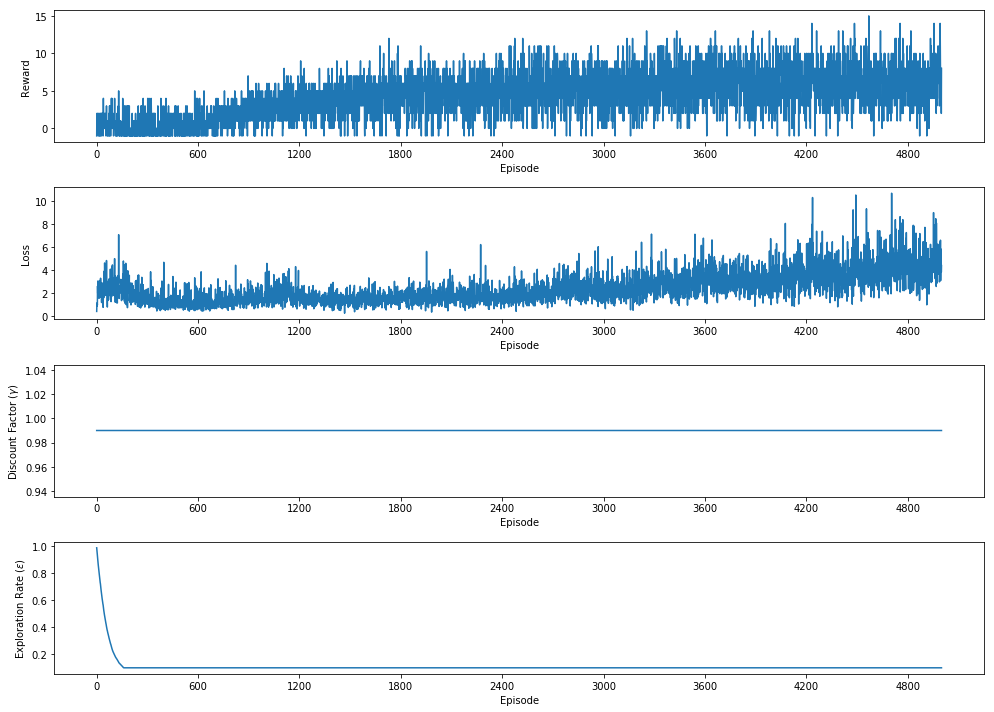

100%|██████████| 5000/5000 [4:33:10<00:00,  3.28s/episode]


In [10]:
agent.train(episodes=5000, callback=JupyterCallback())

In [11]:
res_trained = agent.play()
res_trained

100%|██████████| 30/30 [00:26<00:00,  1.15game/s]


array([ 3.,  5.,  4.,  0.,  3.,  6.,  9.,  6.,  7.,  4., 10.,  4.,  6.,
        8.,  8.,  6.,  3.,  6.,  4.,  7.,  2.,  7.,  9.,  3.,  4.,  8.,
        9., 10.,  3.,  8.])

In [12]:
res_trained.mean()

5.733333333333333